In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | luau
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | artyk
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | mercedes
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | bandrele
Processing Record 18 of Set 1 | dalbandin
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | belur
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | bowen
Processing Record 23 of Set

Processing Record 37 of Set 4 | aporawan
City not found. Skipping...
Processing Record 38 of Set 4 | bandar-e lengeh
Processing Record 39 of Set 4 | kargat
Processing Record 40 of Set 4 | westport
Processing Record 41 of Set 4 | alpignano
Processing Record 42 of Set 4 | karangasem
Processing Record 43 of Set 4 | morehead
Processing Record 44 of Set 4 | manggar
Processing Record 45 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 4 | kahului
Processing Record 47 of Set 4 | evensk
Processing Record 48 of Set 4 | ust-nera
Processing Record 49 of Set 4 | pueblo nuevo
Processing Record 50 of Set 4 | marsa matruh
Processing Record 1 of Set 5 | sitio novo do tocantins
Processing Record 2 of Set 5 | cacoal
Processing Record 3 of Set 5 | lebu
Processing Record 4 of Set 5 | mrirt
City not found. Skipping...
Processing Record 5 of Set 5 | iwanai
Processing Record 6 of Set 5 | morondava
Processing Record 7 of Set 5 | palmer
Processing Record 8 of Set 5 | ylojarvi
Processi

Processing Record 25 of Set 8 | killarney
Processing Record 26 of Set 8 | luderitz
Processing Record 27 of Set 8 | verkhnyaya pyshma
Processing Record 28 of Set 8 | kuito
Processing Record 29 of Set 8 | halifax
Processing Record 30 of Set 8 | bilibino
Processing Record 31 of Set 8 | seydisehir
Processing Record 32 of Set 8 | nantucket
Processing Record 33 of Set 8 | aviles
Processing Record 34 of Set 8 | pangody
Processing Record 35 of Set 8 | urumqi
Processing Record 36 of Set 8 | ambilobe
Processing Record 37 of Set 8 | juegang
Processing Record 38 of Set 8 | nome
Processing Record 39 of Set 8 | hirara
Processing Record 40 of Set 8 | goderich
Processing Record 41 of Set 8 | norrtalje
Processing Record 42 of Set 8 | inirida
Processing Record 43 of Set 8 | tulle
Processing Record 44 of Set 8 | padang
Processing Record 45 of Set 8 | cayenne
Processing Record 46 of Set 8 | arandis
Processing Record 47 of Set 8 | isangel
Processing Record 48 of Set 8 | jalu
Processing Record 49 of Set 8 |

Processing Record 13 of Set 12 | klaksvik
Processing Record 14 of Set 12 | kolokani
Processing Record 15 of Set 12 | tilichiki
Processing Record 16 of Set 12 | longlac
City not found. Skipping...
Processing Record 17 of Set 12 | durham
Processing Record 18 of Set 12 | hualmay
Processing Record 19 of Set 12 | kamenka
Processing Record 20 of Set 12 | baghdad
Processing Record 21 of Set 12 | follebu
Processing Record 22 of Set 12 | kalemie
Processing Record 23 of Set 12 | coos bay
Processing Record 24 of Set 12 | camana
Processing Record 25 of Set 12 | fremont
Processing Record 26 of Set 12 | hvammstangi
City not found. Skipping...
Processing Record 27 of Set 12 | kutum
Processing Record 28 of Set 12 | fort frances
Processing Record 29 of Set 12 | bonavista
Processing Record 30 of Set 12 | navahrudak
Processing Record 31 of Set 12 | hunza
City not found. Skipping...
Processing Record 32 of Set 12 | moba
Processing Record 33 of Set 12 | paranga
Processing Record 34 of Set 12 | praia da vit

In [9]:
len(city_data)

571

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,51.12,40,41,26.08,CL,2021-10-10 17:02:25
1,Luau,-10.7073,22.2247,87.24,23,62,2.26,AO,2021-10-10 17:02:26
2,Hermanus,-34.4187,19.2345,64.65,64,96,3.13,ZA,2021-10-10 17:02:26
3,Saint George,37.1041,-113.5841,65.43,46,1,1.99,US,2021-10-10 17:02:26
4,Bredasdorp,-34.5322,20.0403,57.72,84,82,6.26,ZA,2021-10-10 17:02:27
5,Ushuaia,-54.8000,-68.3000,46.36,53,28,15.61,AR,2021-10-10 17:00:09
6,Hilo,19.7297,-155.0900,75.27,96,75,1.99,US,2021-10-10 17:02:27
7,Thompson,55.7435,-97.8558,42.96,100,90,5.75,CA,2021-10-10 17:02:11
8,Chokurdakh,70.6333,147.9167,14.16,90,94,5.73,RU,2021-10-10 17:02:28
9,Rikitea,-23.1203,-134.9692,74.62,81,100,19.13,PF,2021-10-10 17:02:28


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-10-10 17:02:25,-53.1500,-70.9167,51.12,40,41,26.08
1,Luau,AO,2021-10-10 17:02:26,-10.7073,22.2247,87.24,23,62,2.26
2,Hermanus,ZA,2021-10-10 17:02:26,-34.4187,19.2345,64.65,64,96,3.13
3,Saint George,US,2021-10-10 17:02:26,37.1041,-113.5841,65.43,46,1,1.99
4,Bredasdorp,ZA,2021-10-10 17:02:27,-34.5322,20.0403,57.72,84,82,6.26
...,...,...,...,...,...,...,...,...,...
566,Matagami,CA,2021-10-10 17:06:51,49.7502,-77.6328,61.21,85,100,10.22
567,Huanren,CN,2021-10-10 17:06:51,41.2647,125.3667,44.33,79,92,2.59
568,Cam Ranh,VN,2021-10-10 17:06:52,11.9214,109.1591,78.76,94,75,4.61
569,Ola,RU,2021-10-10 17:06:52,59.5833,151.2833,31.42,63,1,6.11


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

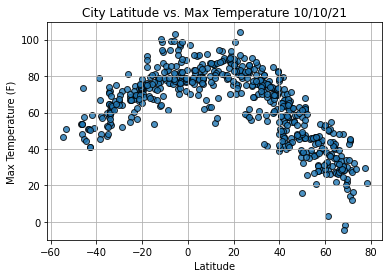

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

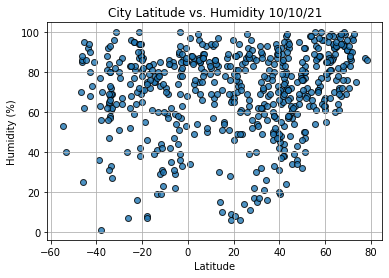

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

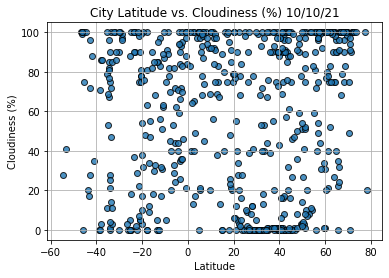

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

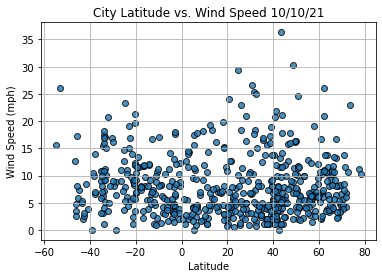

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                     Saldanha
Country                        ZA
Date          2021-10-10 17:02:30
Lat                      -33.0117
Lng                       17.9442
Max Temp                    60.66
Humidity                       69
Cloudiness                     85
Wind Speed                  10.04
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Saint George,US,2021-10-10 17:02:26,37.1041,-113.5841,65.43,46,1,1.99
6,Hilo,US,2021-10-10 17:02:27,19.7297,-155.0900,75.27,96,75,1.99
7,Thompson,CA,2021-10-10 17:02:11,55.7435,-97.8558,42.96,100,90,5.75
8,Chokurdakh,RU,2021-10-10 17:02:28,70.6333,147.9167,14.16,90,94,5.73
12,Barrow,US,2021-10-10 17:02:29,71.2906,-156.7887,28.42,86,90,11.50


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

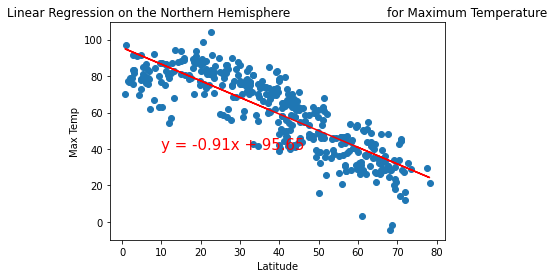

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

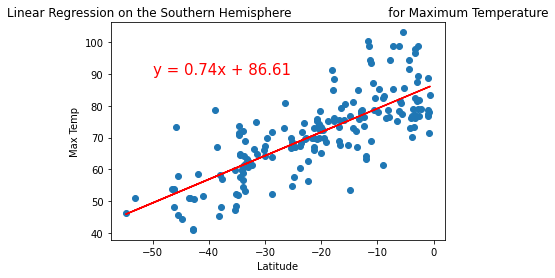

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

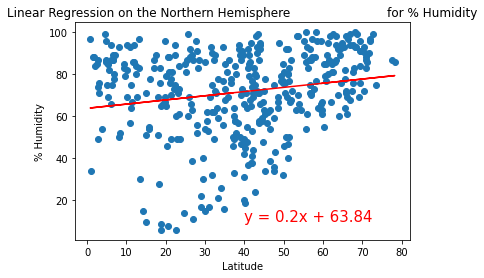

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

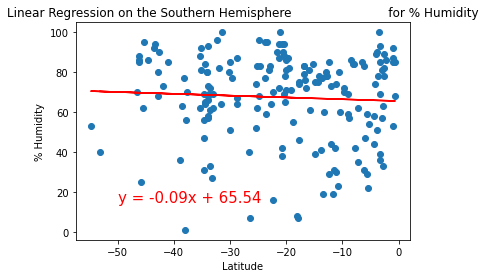

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

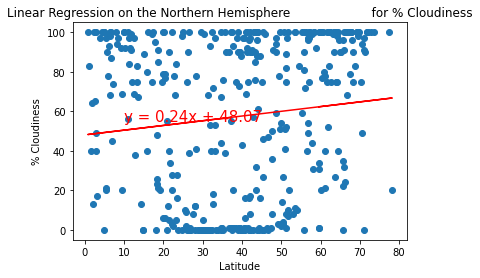

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

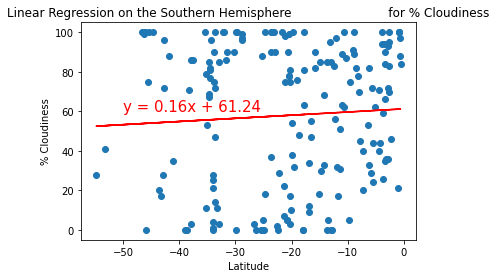

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

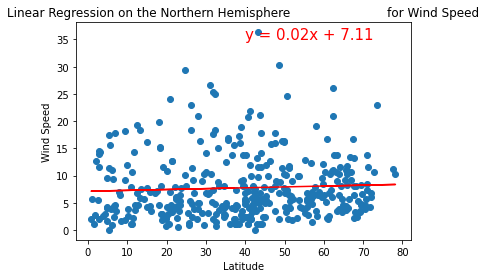

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

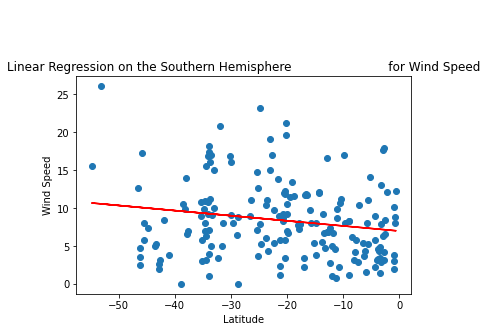

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))